## ⭐ 1. What is a t-test?

* A t-test is a statistical test used to check whether:

* A sample mean is significantly different from a known value (OR)

* Two group means are significantly different

* It uses the t-distribution, not the normal distribution.

## ⭐ 2. When do we use a t-test?

Use t-test when:

* ✔ Sample size is small (n < 30)
* ✔ Population standard deviation (σ) is unknown
* ✔ Data is approximately normal

## ⭐ 3. Types of t-Tests

| Type                                | Purpose                                         |
| ----------------------------------- | ----------------------------------------------- |
| One-sample t-test                   | Compare sample mean with known population mean  |
| Two-sample t-test (Independent)     | Compare two independent groups                  |
| Paired t-test                       | Compare before–after measurements on same group |


## One-sample t-test

🧠 Goal:

* Check if the sample mean is significantly different from a known population mean (claim).

* A company claims the average battery life = 10 hours.
* You test n = 8 phones and get these values: 9.5, 9.0, 10.2, 8.8, 9.3, 9.1, 9.7, 8.9
* We want to test:
* 👉 Is the true mean different from 10 hours?

### ⭐ Step 1: Write the hypotheses

* Null Hypothesis (H0): μ = 10 (The claim is true)

* Alternative Hypothesis (H1): μ ≠ 10 (Mean is different)

* This is a two-tailed test.

### ⭐ Step 2: Calculate Sample Statistics
#### 2.1 Calculate sample mean (x̄)

* Add all values: 9.5 + 9.0 + 10.2 + 8.8 + 9.3 + 9.1 + 9.7 + 8.9 = 74.5
* x̄ = 74.5 / 8 = 9.3125
* ✔ Sample mean = 9.3125 hours

#### 2.2 Calculate sample standard deviation (s)
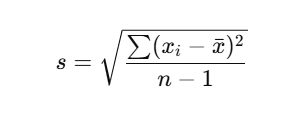
| xi   | xi - x̄ | (xi - x̄)² |
| ---- | ------- | ---------- |
| 9.5  | 0.1875  | 0.0352     |
| 9.0  | -0.3125 | 0.0977     |
| 10.2 | 0.8875  | 0.7876     |
| 8.8  | -0.5125 | 0.2626     |
| 9.3  | -0.0125 | 0.000156   |
| 9.1  | -0.2125 | 0.0451     |
| 9.7  | 0.3875  | 0.1502     |
| 8.9  | -0.4125 | 0.1701     |

Sum of squares = 1.5487

* Now:

* s = √(1.5487 / (8 − 1))
* s = √(1.5487 / 7)
* s = √0.22124
* s = 0.4704

✔ Standard deviation = 0.4704

### ⭐ Step 3: Calculate Standard Error (SE)
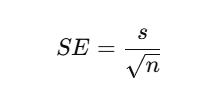
* SE = 0.4704 / √8
* SE = 0.4704 / 2.828
* SE = 0.1663

### ⭐ Step 4: Calculate t-Statistic
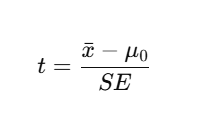
Plug values:

* μ₀ = 10
* x̄ = 9.3125

* t = (9.3125 − 10) / 0.1663
* t = −0.6875 / 0.1663
* t = −4.13

### ⭐ Step 5: Degrees of Freedom (df)

* df = n−1 = 8−1 = 7

* ✔ df = 7

### ⭐ Step 6: Find Critical t-value

* For 95% confidence, two-tailed, df = 7:

* t-critical = ±2.365

### ⭐ Step 7: Compare and Decide

* Our calculated:

* t = −4.13
* t-critical = ±2.365

Since:

* |−4.13| > 2.365
* → We Reject H0

In [7]:
from scipy.stats import t
import numpy as np
import math

weights = np.array([9.5, 9.0, 10.2, 8.8, 9.3, 9.1, 9.7, 8.9])
pop_mean = 10 

n = len(weights)
sample_mean = np.mean(weights)
s = np.std(weights)

SE = s / math.sqrt(n)
t_stat = (sample_mean - pop_mean) / SE

df = n - 1

p_val = 2 * (1 - t.cdf(abs(t_stat), df))

print(f"Sample Mean = {sample_mean:.4f}")
print(f"Sample SD = {s:.4f}")
print(f"Standard Error = {SE:.4f}")
print(f"t-statistic = {t_stat:.4f}")
print(f"Degrees of Freedom = {df}")
print(f"p-value = {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Mean is significantly different from 50g.")
else:
    print("Fail to Reject H0 → Mean is not significantly different from 50g.")


Sample Mean = 9.3125
Sample SD = 0.4400
Standard Error = 0.1556
t-statistic = -4.4195
Degrees of Freedom = 7
p-value = 0.0031
Reject H0 → Mean is significantly different from 50g.


In [8]:
import numpy as np
from scipy.stats import ttest_1samp

# Sample data
data = [9.5, 9.0, 10.2, 8.8, 9.3, 9.1, 9.7, 8.9]

# Population mean (claimed value)
mu = 10

# One-sample t-test
t_stat, p_value = ttest_1samp(data, mu)

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Sample mean is significantly different from", mu)
else:
    print("Fail to Reject H0: No significant difference from", mu)


t-statistic: -4.134053154015563
p-value: 0.004381677254826898
Reject H0: Sample mean is significantly different from 10


## TWO-SAMPLE t-test (Independent t-test)

* This test compares means of two independent groups.

Example:

You want to compare:

* Group A (before training)

* Group B (after training)

Or:

* Male vs Female scores

* Drug A vs Drug B

* Section 1 vs Section 2

### ⭐ When to use Two-Sample t-test?

Use it when:

* ✔ Two groups are independent
* ✔ You want to compare means
* ✔ Data is numerical
* ✔ Sample sizes can be small (<30)
* ✔ Population SD is unknown

### ⭐ Hypotheses Format

H0: μ1 = μ2
(Both groups have same mean)

H1: μ1 ≠ μ2
(Means are different)

In [9]:
import numpy as np
from scipy.stats import ttest_ind

# Sample Data
group1 = [45, 50, 55, 60, 52]       # Group A
group2 = [42, 48, 47, 49, 51]       # Group B

# Two-sample independent t-test
t_stat, p_value = ttest_ind(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: The two group means are significantly different.")
else:
    print("Fail to Reject H0: No significant difference between the two group means.")


t-statistic: 1.7129717745688293
p-value: 0.12507130384724086
Fail to Reject H0: No significant difference between the two group means.


## 🔹Paired t-test?

A paired t-test (aka dependent t-test) compares the means of two related samples — typically “before vs after”, or measurements on the same subjects under two conditions. It tests whether the average difference between the paired observations is significantly different from zero.

Use when: same subjects measured twice (before/after), or matched pairs.

✳️ Example (manual calculation)

Before scores (x₁): 70, 68, 75, 80, 72, 69, 74, 71
After scores (x₂): 72, 70, 78, 82, 74, 70, 75, 73

| Subject | Before | After | d = After − Before |
| ------- | ------ | ----- | ------------------ |
| 1       | 70     | 72    | 2                  |
| 2       | 68     | 70    | 2                  |
| 3       | 75     | 78    | 3                  |
| 4       | 80     | 82    | 2                  |
| 5       | 72     | 74    | 2                  |
| 6       | 69     | 70    | 1                  |
| 7       | 74     | 75    | 1                  |
| 8       | 71     | 73    | 2                  |
    
Differences: [2, 2, 3, 2, 2, 1, 1, 2]

In [11]:
from scipy.stats import ttest_rel

before = [70,68,75,80,72,69,74,71]
after  = [72,70,78,82,74,70,75,73]

t_stat, p_value = ttest_rel(after, before)   # after - before
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 8.275159265510556
p-value: 7.340169483584424e-05


Manual calculation in Python

In [12]:
import math
before = [70,68,75,80,72,69,74,71]
after  = [72,70,78,82,74,70,75,73]
diff = [a - b for a,b in zip(after, before)]
n = len(diff)
dbar = sum(diff) / n

# sample sd of differences
ss = sum((d - dbar)**2 for d in diff)
sd = math.sqrt(ss / (n - 1))
se = sd / math.sqrt(n)
t = dbar / se

print("differences:", diff)
print("mean diff:", dbar)
print("sd diff:", sd)
print("SE:", se)
print("t:", t, "df:", n-1)


differences: [2, 2, 3, 2, 2, 1, 1, 2]
mean diff: 1.875
sd diff: 0.6408699444616557
SE: 0.2265817417937414
t: 8.275159265510558 df: 7
